In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
# loading a sample dataset
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
# Display basic info
df.info()
print("\nFirst 5 rows:\n",df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2       

In [ ]:
# Selecting numerical features and target
x=df[['Pregnancies','Glucose','SkinThickness','Insulin']].dropna()
y=df['BMI']

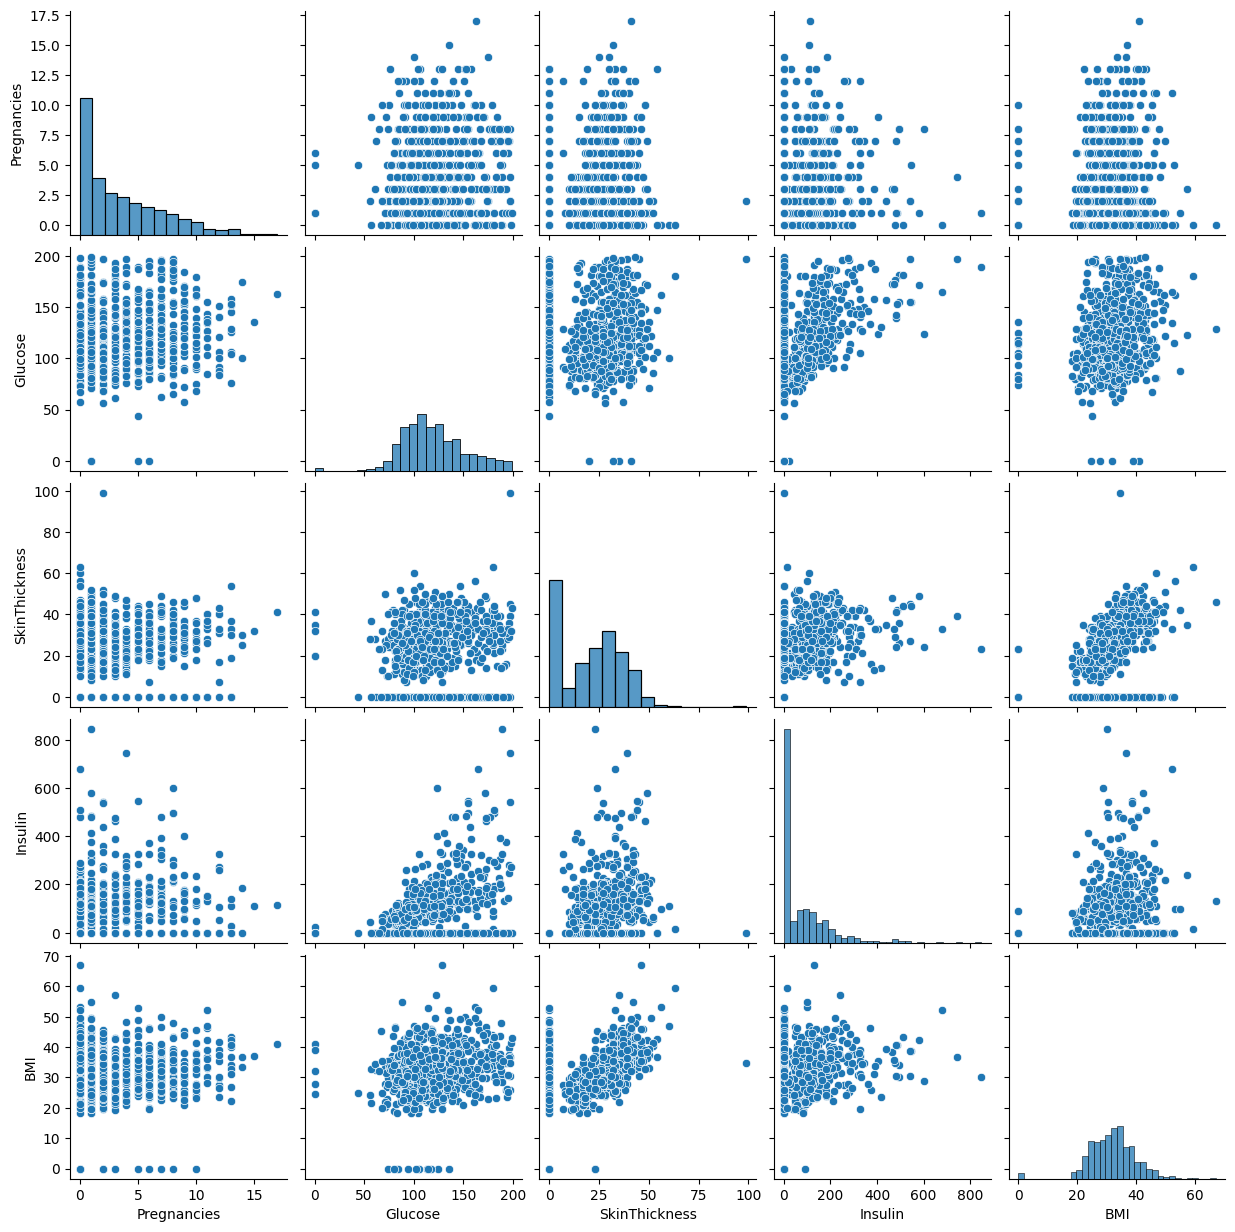

In [ ]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df[['Pregnancies','Glucose','SkinThickness','Insulin','BMI']])
plt.show()

In [ ]:
# Splitting Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Standardize features
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
# Apply PCA for Dimensionality Reduction
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

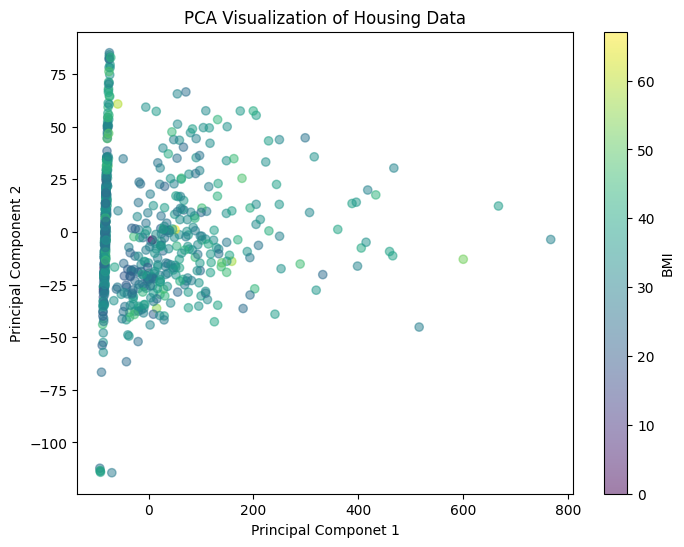

In [ ]:
# PCA Viaualization
plt.figure(figsize=(8,6))
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train,cmap='viridis',alpha=0.5)
plt.colorbar(label='BMI')
plt.xlabel('Principal Componet 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Housing Data')
plt.show()

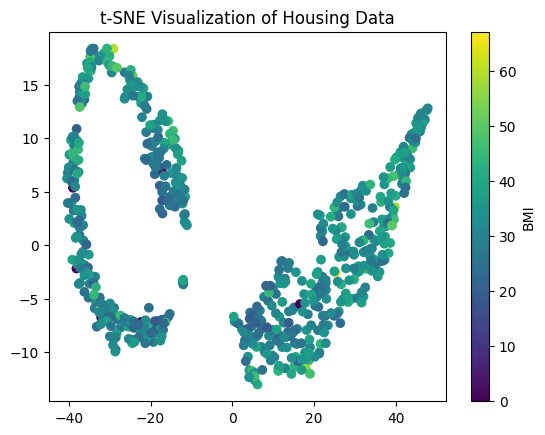

In [ ]:
# Apply t-SNE for visualization
sample_size=1000 # Reduce data for t-SNE to avoid computation overload
x_sample,y_sample=x_train[:sample_size],y_train[:sample_size]
tsne=TSNE(n_components=2,random_state=42)
x_train_tsne=tsne.fit_transform(x_sample)
plt.scatter(x_train_tsne[:,0],x_train_tsne[:,1],c=y_sample,cmap='viridis')
plt.colorbar(label='BMI')
plt.title('t-SNE Visualization of Housing Data')
plt.show()

In [ ]:
# Train Ensemble Models
bagging_model=BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=100,random_state=42)
bagging_model.fit(x_train_pca,y_train)

booting_model=AdaBoostRegressor(estimator=DecisionTreeRegressor(),n_estimators=100,random_state=42)
booting_model.fit(x_train_pca,y_train)

stacking_model=StackingRegressor(
    estimators=[('dt',DecisionTreeRegressor()),('rf',RandomForestRegressor())],
    final_estimator=LinearRegression()
)
stacking_model.fit(x_train_pca,y_train)

StackingRegressor(estimators=[('dt', DecisionTreeRegressor()),
                              ('rf', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [ ]:
# Model Evaluation
def evaluate_model(model,name):
  y_pred=model.predict(x_test_pca)
  print(f"\n{name}Model Evaluation:")
  print(f"Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
  print(f"Mean Squared Error:",mean_squared_error(y_test,y_pred))
  print(f"R^2 Score:",r2_score(y_test,y_pred))

evaluate_model(bagging_model,"Bagging")
evaluate_model(booting_model,"Boosting")
evaluate_model(stacking_model,"Stacking")


BaggingModel Evaluation:
Mean Absolute Error: 6.867026623376626
Mean Squared Error: 84.64752356492069
R^2 Score: -0.19078559255951344

BoostingModel Evaluation:
Mean Absolute Error: 6.711769480519481
Mean Squared Error: 84.6864432224026
R^2 Score: -0.191333097854943

StackingModel Evaluation:
Mean Absolute Error: 5.922712860616581
Mean Squared Error: 68.49619947682632
R^2 Score: 0.03642440975214989


In [ ]:
# User Input for Prediction
print("\nEnter feature values for prediction:")
MedInc=float(input("Pregnancies:"))
HouseAge=float(input("Glucose:"))
AveRooms=float(input("SkinThickness:"))
AveOccup=float(input("Insulin:"))

# Preprocess input and make predictions
user_input=np.array[MedInc,HouseAge,AveRooms,AveOccup].reshape(1,-1)
user_input=scaler.transform(user_input)
user_input_pca=pca.transform(user_input)

bagging_prediction=bagging_model.predict(user_input_pca)
boosting_prediction=boosting_model.predict(user_input_pca)
stacking_prediction=stacking_model.predict(user_input_pca)

print("\nPredicted House Price using Bgging:",bagging_prediction[0])
print("Predicted House Price using Boosting:",boosting_prediction[0])
print("Predicted House Price using Stacking:",stacking_prediction[0])


Enter feature values for prediction:
